## - 다중회귀분석 적합 및 단순선형회귀와의 비교

In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm

In [2]:
# 현재경로 확인
os.getcwd()

'/Users/ichanghwan/Documents/Machine_Learning/Regression_analysis'

# 단순선형회귀분석(선형회귀실습자료와동일)

In [3]:
# 데이터 불러오기
boston = pd.read_csv("data/Boston_house.csv")
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [4]:
boston_data = boston.drop(['Target'],axis=1)
# boston_data

In [6]:
'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

'\n타겟 데이터\n1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n특징 데이터\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율'

In [5]:
target = boston[['Target']]
# boston_target
crim=boston[['CRIM']]
rm=boston[['RM']]
lstat=boston['LSTAT']

In [6]:
crim1 = sm.add_constant(crim, has_constant='add')

In [7]:
model1 = sm.OLS(target,crim1)
fitted_model1=model1.fit()


In [8]:
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           1.17e-19
Time:                        20:59:14   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
pred1=fitted_model1.predict(crim1)

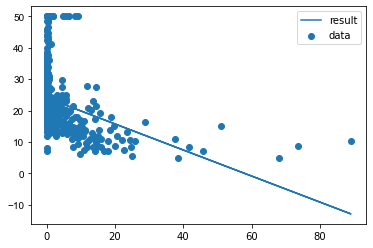

In [10]:
import matplotlib.pyplot as plt
plt.yticks(fontname = "Arial") #
plt.scatter(crim,target,label="data")
plt.plot(crim,pred1,label="result")
plt.legend()
plt.show()

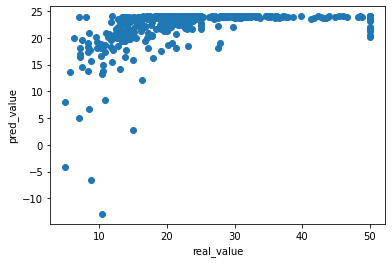

In [11]:

plt.scatter(target,pred1)
plt.xlabel("real_value")
plt.ylabel("pred_value")
plt.show()

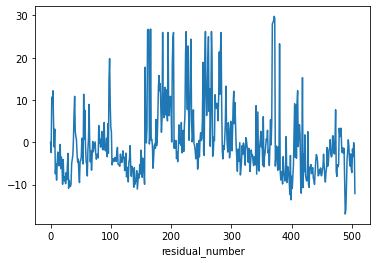

In [12]:
fitted_model1.resid.plot()
plt.xlabel("residual_number")
plt.show()

In [13]:
sum(fitted_model1.resid)

-7.904787935331115e-13

In [14]:
rm1 = sm.add_constant(rm, has_constant='add')
lstat1 = sm.add_constant(lstat, has_constant='add')

In [15]:
model2 = sm.OLS(target,rm1)
fitted_model2=model2.fit()
model3 = sm.OLS(target,lstat1)
fitted_model3=model3.fit()

In [16]:
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           2.49e-74
Time:                        20:59:20   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 17 Jan 2021   Prob (F-statistic):           5.08e-88
Time:                        20:59:21   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
pred2=fitted_model2.predict(rm1)
pred3=fitted_model3.predict(lstat1)


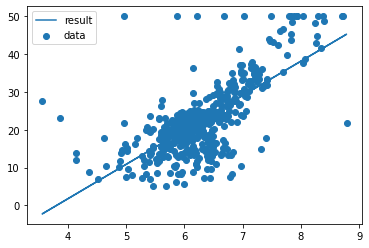

In [19]:
plt.scatter(rm,target,label="data")
plt.plot(rm,pred2,label="result")
plt.legend()
plt.show()

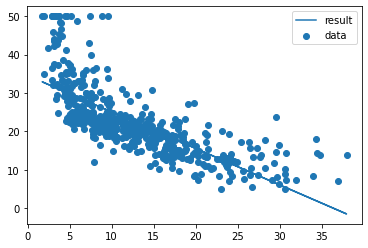

In [20]:
plt.scatter(lstat,target,label="data")
plt.plot(lstat,pred3,label="result")
plt.legend()
plt.show()

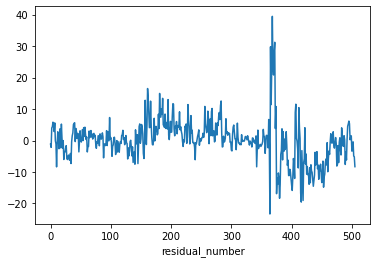

In [21]:
fitted_model2.resid.plot()
plt.xlabel("residual_number")
plt.show()

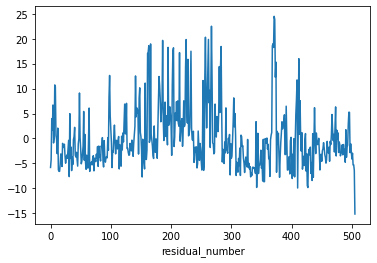

In [22]:
fitted_model3.resid.plot()
plt.xlabel("residual_number")
plt.show()

# 다중선형회귀분석
## crim, rm, lstat 세개의 변수를 통해 다중회귀적합

In [25]:
## bostan data에서 crim, rm, lstat 변수만 뽑아오기 
x_data = boston[['CRIM','RM','LSTAT']]
x_data.head()


,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [26]:
#상수항 추가 add_constant
x_data1 = sm.add_constant(x_data, has_constant='add')

In [27]:
# 회귀모델 적합
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()

### R-squared 
: y의 총변동에 대해서 x가 설명하는 변동의 비율


In [28]:
# summary함수를 통해 결과출력 
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          1.01e-112
Time:                        21:03:23   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 다중공통성이 조금은 있지만 이 회귀모델을 쓰는 것이 나쁘지는 않다.
- 다중 공통성 : 회귀계수에 대한 절대값도 같이 줄어든다.

다중공통성이 조금은 있지만 각각의 pvalue가 상당히 낮기 때문에 이 회귀모델을 쓰는 것이 나쁘지는 않다.

## 단순선형회귀모델의 회귀계수와 비교 

In [30]:
## 단순선형회귀모델의 회귀 계수
print(fitted_model1.params)
print('-'*20)
print(fitted_model2.params)
print('-'*20)
print(fitted_model3.params)

const    24.033106
CRIM     -0.415190
dtype: float64
--------------------
const   -34.670621
RM        9.102109
dtype: float64
--------------------
const    34.553841
LSTAT    -0.950049
dtype: float64


In [31]:
## 다중선형회귀모델의 회귀 계수
# 단순과 비교했을때 감소된것을 확인
print(fitted_multi_model.params)

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


## 행렬연산을 통해 beta구하기 

In [32]:
from numpy import linalg ##행렬연산을 통해 beta구하기 


In [36]:
##행렬연산을 통해 beta구하기 
# 행렬 곱 .dot 
print(np.dot(x_data1.T, x_data1))

# 역행렬
ba = linalg.inv(np.dot(x_data1.T, x_data1)) 
print(ba)

# 역행렬 데이터와 x_data.T의 곱을 한 후 target과 곱
# 이 값들은 다중선형 회귀모델의 회귀계수와 동일
np.dot(np.dot(ba, x_data1.T),target)

[[   506.           1828.44292      3180.025        6402.45      ]
 [  1828.44292     43970.34355515  10821.95113617  37268.4186782 ]
 [  3180.025       10821.95113617  20234.598247    38681.78802   ]
 [  6402.45        37268.4186782   38681.78802    106762.9583    ]]
[[ 3.32623922e-01  3.97977840e-04 -4.58383696e-02 -3.47807838e-03]
 [ 3.97977840e-04  3.40273534e-05 -4.03825708e-05 -2.11132107e-05]
 [-4.58383696e-02 -4.03825708e-05  6.48392767e-03  4.13747886e-04]
 [-3.47807838e-03 -2.11132107e-05  4.13747886e-04  7.54060302e-05]]


array([[-2.56225101],
       [-0.10294089],
       [ 5.21695492],
       [-0.57848582]])

In [37]:
# y_hat구하기 예측값 구하기
pred4 = fitted_multi_model.predict(x_data1)

### residual plot

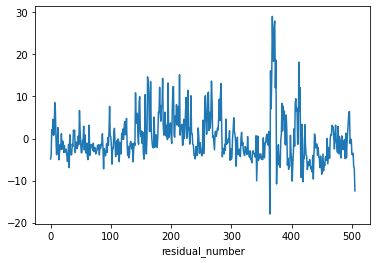

In [38]:
fitted_multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

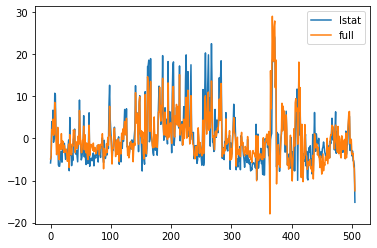

In [40]:
# fitted_model1.resid.plot(label="crim")
# fitted_model2.resid.plot(label="rm")
fitted_model3.resid.plot(label="lstat")
fitted_multi_model.resid.plot(label="full") # R스퀘어가 높아지면 잔차가 낮아짐
plt.legend()